In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

15

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50020 stdev: 0.06038
Best fitness: 0.64502 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.200
Mean genetic distance 2.920, standard deviation 0.482
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 6.028 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54315 stdev: 0.05788
Best fitness: 0.71429 - size: (2, 13) - species 20 - id 297
Average adjusted fitness: 0.149
Mean genetic distance 2.994, standard deviation 0.485
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.910 sec (5.969 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55202 stdev: 0.06812
Best fitness: 0.71429 - size: (2, 13) - species 20 - id 297
Average adjusted fitness: 0.218
Mean genetic distance 3.045, standard deviation 0.497
Population of 205 members in 34 species
Total extinctio

Population's average fitness: 0.63725 stdev: 0.09316
Best fitness: 0.80643 - size: (5, 20) - species 12 - id 2836
Average adjusted fitness: 0.258
Mean genetic distance 3.283, standard deviation 0.485
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.431 sec (7.059 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64213 stdev: 0.09807
Best fitness: 0.80643 - size: (5, 20) - species 12 - id 2836
Average adjusted fitness: 0.313
Mean genetic distance 3.292, standard deviation 0.492
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.522 sec (7.091 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64167 stdev: 0.09701
Best fitness: 0.80643 - size: (5, 20) - species 12 - id 2836
Average adjusted fitness: 0.327
Mean genetic distance 3.283, standard deviation 0.500
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.584 sec (7.182 average)

 ******

Population's average fitness: 0.61940 stdev: 0.09618
Best fitness: 0.75881 - size: (4, 19) - species 14 - id 2080
Average adjusted fitness: 0.242
Mean genetic distance 3.230, standard deviation 0.481
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 8.437 sec (7.578 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62302 stdev: 0.09445
Best fitness: 0.75881 - size: (4, 19) - species 14 - id 2080
Average adjusted fitness: 0.254
Mean genetic distance 3.233, standard deviation 0.490
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 10.727 sec (7.964 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62053 stdev: 0.10010
Best fitness: 0.75881 - size: (4, 19) - species 14 - id 2080
Average adjusted fitness: 0.299
Mean genetic distance 3.258, standard deviation 0.495
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.853 sec (8.085 average)

 *****

Population's average fitness: 0.64573 stdev: 0.12521
Best fitness: 0.78664 - size: (4, 19) - species 15 - id 1024
Average adjusted fitness: 0.361
Mean genetic distance 3.229, standard deviation 0.511
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.121 sec (6.534 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66468 stdev: 0.11237
Best fitness: 0.78664 - size: (4, 15) - species 17 - id 1178
Average adjusted fitness: 0.380
Mean genetic distance 3.191, standard deviation 0.510
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.127 sec (6.608 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66550 stdev: 0.11440
Best fitness: 0.78973 - size: (4, 18) - species 4 - id 1292
Average adjusted fitness: 0.358
Mean genetic distance 3.200, standard deviation 0.520
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 7.121 sec (6.665 average)

 ****** Ru

Population of 189 members in 30 species
Total extinctions: 0
Generation time: 7.965 sec (8.122 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.67903 stdev: 0.12565
Best fitness: 0.83241 - size: (6, 22) - species 13 - id 3902
Average adjusted fitness: 0.381
Mean genetic distance 3.304, standard deviation 0.543
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.829 sec (8.119 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.69141 stdev: 0.11178
Best fitness: 0.83241 - size: (6, 22) - species 13 - id 3902
Average adjusted fitness: 0.440
Mean genetic distance 3.313, standard deviation 0.540
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 8.006 sec (8.110 average)
number of class1:963
number of class2:654

 ****** Running generation 0 ****** 

Population's average fitness: 0.49630 stdev: 0.09608
Best fitness: 0.75510 - size: (2, 13) - species 3 - id 5
Average adjusted 

Mean genetic distance 3.190, standard deviation 0.492
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.614 sec (7.771 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64290 stdev: 0.13360
Best fitness: 0.84972 - size: (6, 20) - species 21 - id 2399
Average adjusted fitness: 0.427
Mean genetic distance 3.196, standard deviation 0.486
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 8.062 sec (7.818 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64579 stdev: 0.12535
Best fitness: 0.84972 - size: (6, 20) - species 21 - id 2399
Average adjusted fitness: 0.325
Mean genetic distance 3.171, standard deviation 0.503
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 8.126 sec (7.858 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64244 stdev: 0.12794
Best fitness: 0.85591 - size: (6, 21) - species 10 - id 3225


Mean genetic distance 3.086, standard deviation 0.494
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 7.292 sec (7.172 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63124 stdev: 0.09214
Best fitness: 0.76994 - size: (5, 18) - species 4 - id 2070
Average adjusted fitness: 0.294
Mean genetic distance 3.100, standard deviation 0.490
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.107 sec (7.186 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62313 stdev: 0.10244
Best fitness: 0.76994 - size: (5, 18) - species 4 - id 2070
Average adjusted fitness: 0.256
Mean genetic distance 3.105, standard deviation 0.496
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.616 sec (7.228 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60893 stdev: 0.11373
Best fitness: 0.77180 - size: (5, 19) - species 4 - id 2360
Ave

Population's average fitness: 0.56863 stdev: 0.07913
Best fitness: 0.72418 - size: (3, 12) - species 4 - id 551
Average adjusted fitness: 0.194
Mean genetic distance 2.982, standard deviation 0.490
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.671 sec (6.191 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57754 stdev: 0.08404
Best fitness: 0.74521 - size: (5, 18) - species 5 - id 986
Average adjusted fitness: 0.251
Mean genetic distance 3.000, standard deviation 0.481
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.171 sec (6.354 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57192 stdev: 0.08855
Best fitness: 0.74521 - size: (5, 18) - species 5 - id 986
Average adjusted fitness: 0.196
Mean genetic distance 3.028, standard deviation 0.487
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.861 sec (6.426 average)

 ****** Running

Population of 200 members in 22 species
Total extinctions: 0
Generation time: 8.876 sec (8.047 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61811 stdev: 0.08886
Best fitness: 0.78973 - size: (6, 24) - species 17 - id 4259
Average adjusted fitness: 0.240
Mean genetic distance 3.214, standard deviation 0.572
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 8.514 sec (8.147 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62228 stdev: 0.09010
Best fitness: 0.78973 - size: (6, 24) - species 17 - id 4259
Average adjusted fitness: 0.235
Mean genetic distance 3.215, standard deviation 0.576
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 8.405 sec (8.221 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.60945 stdev: 0.09811
Best fitness: 0.78973 - size: (6, 24) - species 17 - id 4259
Average adjusted fitness: 0.220
Mean genetic distance 

Mean genetic distance 3.253, standard deviation 0.487
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.169 sec (7.987 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63141 stdev: 0.09808
Best fitness: 0.81818 - size: (8, 25) - species 34 - id 1672
Average adjusted fitness: 0.201
Mean genetic distance 3.249, standard deviation 0.498
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.471 sec (8.101 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63775 stdev: 0.09849
Best fitness: 0.81818 - size: (8, 25) - species 34 - id 1672
Average adjusted fitness: 0.181
Mean genetic distance 3.246, standard deviation 0.503
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.341 sec (8.162 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65441 stdev: 0.09530
Best fitness: 0.81818 - size: (8, 25) - species 34 - id 1672


Mean genetic distance 3.166, standard deviation 0.525
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.512 sec (6.921 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58753 stdev: 0.07649
Best fitness: 0.73408 - size: (6, 20) - species 21 - id 948
Average adjusted fitness: 0.249
Mean genetic distance 3.164, standard deviation 0.517
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 7.675 sec (7.092 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58447 stdev: 0.07758
Best fitness: 0.73408 - size: (6, 20) - species 21 - id 948
Average adjusted fitness: 0.214
Mean genetic distance 3.141, standard deviation 0.526
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 7.864 sec (7.231 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59473 stdev: 0.07947
Best fitness: 0.74644 - size: (7, 22) - species 13 - id 2035
Av

Population's average fitness: 0.54136 stdev: 0.06987
Best fitness: 0.71738 - size: (4, 17) - species 15 - id 473
Average adjusted fitness: 0.238
Mean genetic distance 2.981, standard deviation 0.493
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.507 sec (6.086 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55295 stdev: 0.06680
Best fitness: 0.71985 - size: (3, 14) - species 2 - id 664
Average adjusted fitness: 0.172
Mean genetic distance 3.025, standard deviation 0.489
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.609 sec (6.217 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55758 stdev: 0.07456
Best fitness: 0.72851 - size: (2, 12) - species 13 - id 761
Average adjusted fitness: 0.203
Mean genetic distance 3.012, standard deviation 0.488
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.624 sec (6.298 average)

 ****** Runni

Population's average fitness: 0.62828 stdev: 0.08804
Best fitness: 0.78912 - size: (8, 25) - species 19 - id 2229
Average adjusted fitness: 0.213
Mean genetic distance 3.260, standard deviation 0.516
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.189 sec (7.941 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63335 stdev: 0.08628
Best fitness: 0.78912 - size: (8, 25) - species 19 - id 2229
Average adjusted fitness: 0.237
Mean genetic distance 3.258, standard deviation 0.511
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.225 sec (7.999 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62691 stdev: 0.09077
Best fitness: 0.78912 - size: (8, 25) - species 19 - id 2229
Average adjusted fitness: 0.200
Mean genetic distance 3.253, standard deviation 0.504
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 8.345 sec (8.110 average)

 ******

Population's average fitness: 0.63174 stdev: 0.09794
Best fitness: 0.80334 - size: (4, 16) - species 12 - id 1540
Average adjusted fitness: 0.228
Mean genetic distance 3.228, standard deviation 0.494
Population of 190 members in 41 species
Total extinctions: 0
Generation time: 7.630 sec (7.440 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64433 stdev: 0.09127
Best fitness: 0.80396 - size: (7, 25) - species 7 - id 2467
Average adjusted fitness: 0.222
Mean genetic distance 3.237, standard deviation 0.519
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 7.591 sec (7.479 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64652 stdev: 0.09459
Best fitness: 0.80396 - size: (7, 25) - species 7 - id 2467
Average adjusted fitness: 0.208
Mean genetic distance 3.254, standard deviation 0.508
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 7.679 sec (7.512 average)

 ****** R

Mean genetic distance 3.144, standard deviation 0.496
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.858 sec (6.641 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66337 stdev: 0.10826
Best fitness: 0.79035 - size: (4, 18) - species 19 - id 1375
Average adjusted fitness: 0.396
Mean genetic distance 3.147, standard deviation 0.496
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.040 sec (6.681 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66452 stdev: 0.10728
Best fitness: 0.80519 - size: (3, 16) - species 3 - id 1625
Average adjusted fitness: 0.377
Mean genetic distance 3.152, standard deviation 0.492
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.946 sec (6.811 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64356 stdev: 0.12997
Best fitness: 0.80519 - size: (3, 16) - species 3 - id 1625
Ave

Mean genetic distance 3.292, standard deviation 0.557
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.325 sec (7.956 average)
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.50231 stdev: 0.05728
Best fitness: 0.65615 - size: (2, 13) - species 1 - id 5
Average adjusted fitness: 0.190
Mean genetic distance 2.860, standard deviation 0.482
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.641 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51979 stdev: 0.05477
Best fitness: 0.66605 - size: (3, 14) - species 2 - id 314
Average adjusted fitness: 0.228
Mean genetic distance 2.956, standard deviation 0.465
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 6.105 sec (5.873 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54008 stdev: 0.05725
Best fitness: 0.72913 - size: (3, 16) - spec

Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.698 sec (7.793 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61725 stdev: 0.08494
Best fitness: 0.79406 - size: (5, 19) - species 29 - id 2806
Average adjusted fitness: 0.166
Mean genetic distance 3.237, standard deviation 0.510
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 7.827 sec (7.788 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61228 stdev: 0.08895
Best fitness: 0.79406 - size: (5, 19) - species 29 - id 2806
Average adjusted fitness: 0.232
Mean genetic distance 3.216, standard deviation 0.528
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 7.687 sec (7.785 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61513 stdev: 0.09656
Best fitness: 0.79406 - size: (5, 19) - species 29 - id 2806
Average adjusted fitness: 0.216
Mean genetic distance 

Mean genetic distance 3.113, standard deviation 0.482
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 7.621 sec (7.261 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.68459 stdev: 0.12148
Best fitness: 0.82684 - size: (5, 20) - species 3 - id 2005
Average adjusted fitness: 0.377
Mean genetic distance 3.133, standard deviation 0.499
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 7.339 sec (7.284 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68362 stdev: 0.13119
Best fitness: 0.82684 - size: (5, 20) - species 3 - id 2005
Average adjusted fitness: 0.382
Mean genetic distance 3.150, standard deviation 0.506
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.299 sec (7.321 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69482 stdev: 0.12079
Best fitness: 0.83550 - size: (5, 19) - species 24 - id 2339
Av

Mean genetic distance 3.166, standard deviation 0.502
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 6.854 sec (6.468 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66810 stdev: 0.11824
Best fitness: 0.83055 - size: (3, 16) - species 21 - id 532
Average adjusted fitness: 0.418
Mean genetic distance 3.180, standard deviation 0.485
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 6.817 sec (6.518 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68156 stdev: 0.11238
Best fitness: 0.83055 - size: (3, 16) - species 21 - id 532
Average adjusted fitness: 0.448
Mean genetic distance 3.188, standard deviation 0.501
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 7.225 sec (6.607 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67750 stdev: 0.11876
Best fitness: 0.83055 - size: (3, 16) - species 21 - id 532
Averag

Mean genetic distance 3.294, standard deviation 0.517
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 8.575 sec (8.476 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.69503 stdev: 0.13617
Best fitness: 0.85096 - size: (9, 25) - species 17 - id 2817
Average adjusted fitness: 0.391
Mean genetic distance 3.318, standard deviation 0.531
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 8.408 sec (8.482 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.70094 stdev: 0.12692
Best fitness: 0.85096 - size: (9, 25) - species 17 - id 2817
Average adjusted fitness: 0.411
Mean genetic distance 3.310, standard deviation 0.518
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 8.635 sec (8.544 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.69836 stdev: 0.12082
Best fitness: 0.87570 - size: (8, 25) - species 45 - id 4294


Mean genetic distance 3.225, standard deviation 0.478
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.114 sec (7.818 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65476 stdev: 0.12084
Best fitness: 0.79901 - size: (4, 18) - species 4 - id 1310
Average adjusted fitness: 0.343
Mean genetic distance 3.226, standard deviation 0.477
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.204 sec (7.892 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65009 stdev: 0.13168
Best fitness: 0.79901 - size: (4, 18) - species 4 - id 1310
Average adjusted fitness: 0.370
Mean genetic distance 3.229, standard deviation 0.485
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 7.802 sec (7.933 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66733 stdev: 0.11087
Best fitness: 0.79901 - size: (4, 18) - species 4 - id 1310
Ave

Mean genetic distance 3.197, standard deviation 0.446
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 8.198 sec (7.340 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58995 stdev: 0.08380
Best fitness: 0.70686 - size: (6, 23) - species 24 - id 1593
Average adjusted fitness: 0.244
Mean genetic distance 3.196, standard deviation 0.449
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 8.051 sec (7.510 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59074 stdev: 0.08439
Best fitness: 0.70686 - size: (6, 23) - species 24 - id 1593
Average adjusted fitness: 0.241
Mean genetic distance 3.212, standard deviation 0.445
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 8.016 sec (7.631 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59446 stdev: 0.07793
Best fitness: 0.70686 - size: (6, 23) - species 24 - id 1593


Mean genetic distance 2.978, standard deviation 0.494
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.665 sec (6.548 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55083 stdev: 0.05950
Best fitness: 0.68522 - size: (4, 17) - species 6 - id 401
Average adjusted fitness: 0.133
Mean genetic distance 3.046, standard deviation 0.478
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 6.945 sec (6.647 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56065 stdev: 0.06425
Best fitness: 0.68522 - size: (4, 17) - species 6 - id 401
Average adjusted fitness: 0.189
Mean genetic distance 3.099, standard deviation 0.498
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 6.946 sec (6.707 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56738 stdev: 0.06201
Best fitness: 0.68522 - size: (4, 17) - species 16 - id 401
Average 

Mean genetic distance 3.263, standard deviation 0.518
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 8.113 sec (7.821 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.59301 stdev: 0.07396
Best fitness: 0.73408 - size: (4, 19) - species 12 - id 3008
Average adjusted fitness: 0.263
Mean genetic distance 3.241, standard deviation 0.529
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 8.032 sec (7.870 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59716 stdev: 0.07048
Best fitness: 0.73408 - size: (4, 19) - species 12 - id 3008
Average adjusted fitness: 0.160
Mean genetic distance 3.232, standard deviation 0.525
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 8.222 sec (7.894 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59349 stdev: 0.07539
Best fitness: 0.73408 - size: (4, 19) - species 12 - id 3008


Mean genetic distance 3.272, standard deviation 0.501
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.062 sec (7.554 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62905 stdev: 0.08813
Best fitness: 0.77304 - size: (7, 26) - species 34 - id 2199
Average adjusted fitness: 0.261
Mean genetic distance 3.264, standard deviation 0.495
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.866 sec (7.626 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62125 stdev: 0.08857
Best fitness: 0.77304 - size: (7, 26) - species 34 - id 2199
Average adjusted fitness: 0.180
Mean genetic distance 3.255, standard deviation 0.496
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.979 sec (7.663 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62889 stdev: 0.09016
Best fitness: 0.78355 - size: (7, 23) - species 34 - id 2955


Mean genetic distance 3.175, standard deviation 0.481
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.516 sec (6.666 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60447 stdev: 0.07878
Best fitness: 0.76871 - size: (4, 14) - species 37 - id 1300
Average adjusted fitness: 0.326
Mean genetic distance 3.151, standard deviation 0.487
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 7.365 sec (6.736 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60407 stdev: 0.08031
Best fitness: 0.76871 - size: (4, 14) - species 37 - id 1300
Average adjusted fitness: 0.239
Mean genetic distance 3.162, standard deviation 0.485
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.724 sec (6.949 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62086 stdev: 0.07226
Best fitness: 0.77613 - size: (5, 16) - species 37 - id 1714
A

Mean genetic distance 3.255, standard deviation 0.515
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.172 sec (8.101 average)
number of class1:800
number of class2:817

 ****** Running generation 0 ****** 

Population's average fitness: 0.49201 stdev: 0.05571
Best fitness: 0.68646 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.152
Mean genetic distance 2.889, standard deviation 0.428
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.752 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52054 stdev: 0.05630
Best fitness: 0.71305 - size: (3, 14) - species 12 - id 241
Average adjusted fitness: 0.175
Mean genetic distance 2.941, standard deviation 0.443
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.162 sec (5.957 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53862 stdev: 0.06287
Best fitness: 0.71429 - size: (3, 15) - s

Mean genetic distance 3.200, standard deviation 0.527
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.659 sec (7.987 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61472 stdev: 0.07937
Best fitness: 0.74706 - size: (8, 23) - species 36 - id 3250
Average adjusted fitness: 0.168
Mean genetic distance 3.257, standard deviation 0.509
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 8.517 sec (8.061 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62023 stdev: 0.07906
Best fitness: 0.74706 - size: (8, 23) - species 36 - id 3250
Average adjusted fitness: 0.236
Mean genetic distance 3.241, standard deviation 0.509
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 8.325 sec (8.125 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61525 stdev: 0.08395
Best fitness: 0.74768 - size: (9, 26) - species 36 - id 3675


Mean genetic distance 3.165, standard deviation 0.505
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.596 sec (7.552 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62216 stdev: 0.10561
Best fitness: 0.80087 - size: (4, 18) - species 22 - id 1457
Average adjusted fitness: 0.321
Mean genetic distance 3.159, standard deviation 0.516
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.748 sec (7.621 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62755 stdev: 0.10277
Best fitness: 0.80087 - size: (4, 18) - species 22 - id 1457
Average adjusted fitness: 0.240
Mean genetic distance 3.199, standard deviation 0.520
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 7.842 sec (7.683 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63259 stdev: 0.09961
Best fitness: 0.80087 - size: (4, 18) - species 22 - id 1457


Mean genetic distance 3.183, standard deviation 0.483
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.115 sec (6.537 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61667 stdev: 0.10580
Best fitness: 0.85591 - size: (4, 16) - species 32 - id 831
Average adjusted fitness: 0.380
Mean genetic distance 3.184, standard deviation 0.493
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 7.009 sec (6.604 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62012 stdev: 0.10477
Best fitness: 0.85591 - size: (4, 16) - species 32 - id 831
Average adjusted fitness: 0.218
Mean genetic distance 3.184, standard deviation 0.497
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.260 sec (6.686 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64697 stdev: 0.09948
Best fitness: 0.85591 - size: (4, 16) - species 32 - id 831
Averag

Mean genetic distance 3.274, standard deviation 0.501
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.216 sec (7.952 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.66492 stdev: 0.11731
Best fitness: 0.85900 - size: (4, 16) - species 32 - id 1942
Average adjusted fitness: 0.286
Mean genetic distance 3.265, standard deviation 0.519
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 8.184 sec (8.003 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64811 stdev: 0.11058
Best fitness: 0.85900 - size: (4, 16) - species 32 - id 1942
Average adjusted fitness: 0.221
Mean genetic distance 3.256, standard deviation 0.504
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 8.179 sec (8.044 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65211 stdev: 0.11614
Best fitness: 0.85900 - size: (4, 16) - species 32 - id 1942


Mean genetic distance 3.211, standard deviation 0.508
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 7.674 sec (7.778 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66777 stdev: 0.10887
Best fitness: 0.81138 - size: (2, 15) - species 6 - id 2969
Average adjusted fitness: 0.267
Mean genetic distance 3.234, standard deviation 0.507
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.680 sec (7.739 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65628 stdev: 0.11158
Best fitness: 0.81138 - size: (2, 15) - species 6 - id 2969
Average adjusted fitness: 0.317
Mean genetic distance 3.230, standard deviation 0.512
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 8.030 sec (7.749 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66123 stdev: 0.10787
Best fitness: 0.81138 - size: (2, 15) - species 6 - id 2969
Ave

Mean genetic distance 3.141, standard deviation 0.458
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 7.799 sec (7.106 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59795 stdev: 0.06807
Best fitness: 0.70439 - size: (3, 15) - species 38 - id 467
Average adjusted fitness: 0.195
Mean genetic distance 3.165, standard deviation 0.472
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 7.336 sec (7.174 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59935 stdev: 0.06180
Best fitness: 0.70439 - size: (3, 15) - species 38 - id 467
Average adjusted fitness: 0.198
Mean genetic distance 3.157, standard deviation 0.468
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 7.534 sec (7.260 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60115 stdev: 0.06169
Best fitness: 0.70439 - size: (3, 15) - species 38 - id 467
Ave

Mean genetic distance 3.098, standard deviation 0.507
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.512 sec (6.056 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66544 stdev: 0.08543
Best fitness: 0.74830 - size: (3, 16) - species 28 - id 514
Average adjusted fitness: 0.400
Mean genetic distance 3.104, standard deviation 0.516
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.741 sec (6.227 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65547 stdev: 0.09465
Best fitness: 0.76314 - size: (4, 16) - species 32 - id 819
Average adjusted fitness: 0.362
Mean genetic distance 3.112, standard deviation 0.503
Population of 209 members in 34 species
Total extinctions: 0
Generation time: 7.016 sec (6.385 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66585 stdev: 0.08498
Best fitness: 0.76314 - size: (4, 16) - species 32 - id 819
Averag

Mean genetic distance 3.336, standard deviation 0.524
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 8.390 sec (8.081 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66855 stdev: 0.10884
Best fitness: 0.79097 - size: (6, 21) - species 33 - id 2916
Average adjusted fitness: 0.409
Mean genetic distance 3.318, standard deviation 0.516
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.210 sec (8.087 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66659 stdev: 0.11296
Best fitness: 0.79097 - size: (6, 21) - species 33 - id 2916
Average adjusted fitness: 0.360
Mean genetic distance 3.327, standard deviation 0.517
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.445 sec (8.153 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66117 stdev: 0.11848
Best fitness: 0.79097 - size: (6, 21) - species 33 - id 2916


Mean genetic distance 3.162, standard deviation 0.469
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 7.495 sec (7.457 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66656 stdev: 0.12334
Best fitness: 0.80767 - size: (2, 14) - species 8 - id 542
Average adjusted fitness: 0.363
Mean genetic distance 3.179, standard deviation 0.477
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 7.344 sec (7.421 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67192 stdev: 0.12589
Best fitness: 0.80891 - size: (3, 16) - species 8 - id 2655
Average adjusted fitness: 0.440
Mean genetic distance 3.191, standard deviation 0.475
Population of 188 members in 40 species
Total extinctions: 0
Generation time: 7.354 sec (7.422 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66887 stdev: 0.12789
Best fitness: 0.80891 - size: (3, 16) - species 8 - id 2655
Aver

Mean genetic distance 3.147, standard deviation 0.488
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 7.396 sec (6.741 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64112 stdev: 0.13733
Best fitness: 0.80148 - size: (4, 16) - species 32 - id 1121
Average adjusted fitness: 0.330
Mean genetic distance 3.145, standard deviation 0.473
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.132 sec (6.780 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64822 stdev: 0.13744
Best fitness: 0.80148 - size: (4, 16) - species 32 - id 1121
Average adjusted fitness: 0.368
Mean genetic distance 3.158, standard deviation 0.482
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.657 sec (6.978 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63962 stdev: 0.13199
Best fitness: 0.80148 - size: (4, 16) - species 32 - id 1121
A

Mean genetic distance 3.197, standard deviation 0.493
Population of 190 members in 26 species
Total extinctions: 0
Generation time: 8.844 sec (8.465 average)
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.48452 stdev: 0.10513
Best fitness: 0.76500 - size: (2, 13) - species 4 - id 178
Average adjusted fitness: 0.252
Mean genetic distance 2.864, standard deviation 0.504
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.656 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55201 stdev: 0.10424
Best fitness: 0.76500 - size: (2, 13) - species 4 - id 178
Average adjusted fitness: 0.209
Mean genetic distance 2.988, standard deviation 0.521
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 5.927 sec (5.791 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57195 stdev: 0.11172
Best fitness: 0.78850 - size: (2, 13) - sp

Mean genetic distance 3.296, standard deviation 0.522
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.520 sec (8.224 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66022 stdev: 0.12125
Best fitness: 0.85467 - size: (7, 23) - species 30 - id 2632
Average adjusted fitness: 0.287
Mean genetic distance 3.285, standard deviation 0.530
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.689 sec (8.288 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66113 stdev: 0.11823
Best fitness: 0.85467 - size: (7, 23) - species 30 - id 2632
Average adjusted fitness: 0.324
Mean genetic distance 3.274, standard deviation 0.528
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.376 sec (8.318 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66999 stdev: 0.11740
Best fitness: 0.85467 - size: (7, 23) - species 30 - id 2632


Mean genetic distance 3.125, standard deviation 0.489
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.487 sec (7.328 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62670 stdev: 0.09656
Best fitness: 0.78046 - size: (5, 17) - species 7 - id 2156
Average adjusted fitness: 0.261
Mean genetic distance 3.140, standard deviation 0.503
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.705 sec (7.396 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61843 stdev: 0.09556
Best fitness: 0.78046 - size: (5, 17) - species 7 - id 2156
Average adjusted fitness: 0.219
Mean genetic distance 3.128, standard deviation 0.509
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.718 sec (7.454 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61979 stdev: 0.10261
Best fitness: 0.78046 - size: (5, 17) - species 7 - id 2156
Ave

Mean genetic distance 3.049, standard deviation 0.484
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.219 sec (6.480 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60506 stdev: 0.11108
Best fitness: 0.81385 - size: (2, 13) - species 21 - id 153
Average adjusted fitness: 0.252
Mean genetic distance 3.079, standard deviation 0.502
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 7.043 sec (6.561 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62479 stdev: 0.10460
Best fitness: 0.81385 - size: (2, 13) - species 21 - id 153
Average adjusted fitness: 0.311
Mean genetic distance 3.081, standard deviation 0.493
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 7.102 sec (6.628 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62822 stdev: 0.11056
Best fitness: 0.81385 - size: (2, 13) - species 21 - id 153
Averag

Mean genetic distance 3.272, standard deviation 0.518
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 8.012 sec (7.960 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.67743 stdev: 0.11455
Best fitness: 0.85529 - size: (6, 23) - species 38 - id 2954
Average adjusted fitness: 0.327
Mean genetic distance 3.273, standard deviation 0.517
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.066 sec (8.017 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.67503 stdev: 0.11533
Best fitness: 0.86766 - size: (5, 21) - species 48 - id 4132
Average adjusted fitness: 0.337
Mean genetic distance 3.283, standard deviation 0.509
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.283 sec (8.065 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66826 stdev: 0.11569
Best fitness: 0.86766 - size: (5, 21) - species 48 - id 4132


Mean genetic distance 3.234, standard deviation 0.524
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 7.449 sec (7.629 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.67567 stdev: 0.12557
Best fitness: 0.82066 - size: (5, 20) - species 1 - id 643
Average adjusted fitness: 0.377
Mean genetic distance 3.253, standard deviation 0.522
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.594 sec (7.650 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65750 stdev: 0.13917
Best fitness: 0.82066 - size: (5, 20) - species 1 - id 643
Average adjusted fitness: 0.361
Mean genetic distance 3.259, standard deviation 0.528
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.250 sec (7.705 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67198 stdev: 0.13817
Best fitness: 0.82066 - size: (5, 20) - species 1 - id 643
Averag

Mean genetic distance 3.182, standard deviation 0.477
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.475 sec (7.006 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59643 stdev: 0.07520
Best fitness: 0.71429 - size: (6, 21) - species 36 - id 1495
Average adjusted fitness: 0.193
Mean genetic distance 3.209, standard deviation 0.479
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.690 sec (7.132 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59989 stdev: 0.07034
Best fitness: 0.72913 - size: (5, 16) - species 18 - id 1922
Average adjusted fitness: 0.155
Mean genetic distance 3.224, standard deviation 0.470
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.420 sec (7.207 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60698 stdev: 0.07424
Best fitness: 0.72913 - size: (5, 16) - species 18 - id 1922



 ****** Running generation 3 ****** 

Population's average fitness: 0.57289 stdev: 0.08905
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 128
Average adjusted fitness: 0.273
Mean genetic distance 3.054, standard deviation 0.455
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.544 sec (6.109 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57248 stdev: 0.09307
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 128
Average adjusted fitness: 0.273
Mean genetic distance 3.064, standard deviation 0.458
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.043 sec (6.295 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58384 stdev: 0.08766
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 128
Average adjusted fitness: 0.287
Mean genetic distance 3.107, standard deviation 0.462
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.9

Population's average fitness: 0.62480 stdev: 0.09744
Best fitness: 0.76685 - size: (5, 18) - species 35 - id 2408
Average adjusted fitness: 0.227
Mean genetic distance 3.290, standard deviation 0.509
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 8.188 sec (7.969 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62884 stdev: 0.09659
Best fitness: 0.76685 - size: (5, 18) - species 35 - id 2408
Average adjusted fitness: 0.228
Mean genetic distance 3.287, standard deviation 0.531
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 7.979 sec (8.005 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63116 stdev: 0.09640
Best fitness: 0.76685 - size: (5, 18) - species 35 - id 2408
Average adjusted fitness: 0.297
Mean genetic distance 3.289, standard deviation 0.527
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 7.876 sec (7.995 average)

 ******

Population's average fitness: 0.73455 stdev: 0.14660
Best fitness: 0.86271 - size: (5, 19) - species 5 - id 1981
Average adjusted fitness: 0.541
Mean genetic distance 3.140, standard deviation 0.495
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.007 sec (7.603 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72413 stdev: 0.15755
Best fitness: 0.86271 - size: (5, 19) - species 5 - id 1981
Average adjusted fitness: 0.525
Mean genetic distance 3.127, standard deviation 0.494
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 7.776 sec (7.629 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.71481 stdev: 0.17399
Best fitness: 0.86271 - size: (5, 19) - species 5 - id 1981
Average adjusted fitness: 0.515
Mean genetic distance 3.147, standard deviation 0.491
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.633 sec (7.652 average)

 ****** Ru

Population's average fitness: 0.59770 stdev: 0.09083
Best fitness: 0.73531 - size: (7, 24) - species 27 - id 1497
Average adjusted fitness: 0.227
Mean genetic distance 3.111, standard deviation 0.503
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.318 sec (6.806 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59433 stdev: 0.09696
Best fitness: 0.73531 - size: (7, 24) - species 27 - id 1497
Average adjusted fitness: 0.309
Mean genetic distance 3.108, standard deviation 0.501
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.493 sec (6.974 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61161 stdev: 0.08348
Best fitness: 0.73531 - size: (7, 24) - species 27 - id 1497
Average adjusted fitness: 0.242
Mean genetic distance 3.123, standard deviation 0.499
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.547 sec (7.117 average)

 ******

Population's average fitness: 0.51961 stdev: 0.10500
Best fitness: 0.74706 - size: (2, 13) - species 9 - id 78
Average adjusted fitness: 0.360
Mean genetic distance 2.983, standard deviation 0.517
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.761 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57099 stdev: 0.10347
Best fitness: 0.82746 - size: (3, 15) - species 10 - id 343
Average adjusted fitness: 0.336
Mean genetic distance 3.053, standard deviation 0.506
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.083 sec (5.922 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59514 stdev: 0.10663
Best fitness: 0.82746 - size: (3, 15) - species 24 - id 343
Average adjusted fitness: 0.323
Mean genetic distance 3.102, standard deviation 0.511
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.503 sec (6.116 average)

 ****** Running generation 3 *

Population's average fitness: 0.68201 stdev: 0.11672
Best fitness: 0.86147 - size: (5, 18) - species 15 - id 2745
Average adjusted fitness: 0.293
Mean genetic distance 3.271, standard deviation 0.491
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.027 sec (7.832 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66878 stdev: 0.12817
Best fitness: 0.86147 - size: (5, 18) - species 15 - id 2745
Average adjusted fitness: 0.331
Mean genetic distance 3.274, standard deviation 0.490
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.502 sec (7.931 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67528 stdev: 0.12523
Best fitness: 0.86147 - size: (5, 18) - species 15 - id 2745
Average adjusted fitness: 0.443
Mean genetic distance 3.270, standard deviation 0.494
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 8.536 sec (8.004 average)

 ******

Population's average fitness: 0.63347 stdev: 0.08936
Best fitness: 0.77427 - size: (8, 26) - species 7 - id 2165
Average adjusted fitness: 0.267
Mean genetic distance 3.212, standard deviation 0.489
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.132 sec (7.724 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62848 stdev: 0.09780
Best fitness: 0.77427 - size: (8, 26) - species 7 - id 2165
Average adjusted fitness: 0.346
Mean genetic distance 3.200, standard deviation 0.497
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 8.090 sec (7.802 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63120 stdev: 0.09497
Best fitness: 0.78850 - size: (6, 22) - species 33 - id 2471
Average adjusted fitness: 0.222
Mean genetic distance 3.213, standard deviation 0.498
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.202 sec (7.905 average)

 ****** R

Mean genetic distance 3.061, standard deviation 0.491
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 7.058 sec (6.653 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60625 stdev: 0.09932
Best fitness: 0.78602 - size: (6, 22) - species 17 - id 1063
Average adjusted fitness: 0.258
Mean genetic distance 3.020, standard deviation 0.479
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.593 sec (6.770 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61309 stdev: 0.10241
Best fitness: 0.78602 - size: (6, 22) - species 5 - id 1063
Average adjusted fitness: 0.343
Mean genetic distance 3.074, standard deviation 0.478
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 7.823 sec (6.887 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62735 stdev: 0.09916
Best fitness: 0.78602 - size: (6, 22) - species 21 - id 1063
Aver

Mean genetic distance 3.281, standard deviation 0.484
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 9.539 sec (8.851 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63295 stdev: 0.09776
Best fitness: 0.80643 - size: (10, 28) - species 22 - id 3758
Average adjusted fitness: 0.212
Mean genetic distance 3.298, standard deviation 0.511
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 9.791 sec (9.012 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63379 stdev: 0.10356
Best fitness: 0.80643 - size: (10, 28) - species 22 - id 3758
Average adjusted fitness: 0.305
Mean genetic distance 3.303, standard deviation 0.504
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 9.604 sec (9.107 average)
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49763 stdev: 0.04950
Best fitness: 0.70

Mean genetic distance 3.249, standard deviation 0.484
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 8.227 sec (8.097 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59623 stdev: 0.08458
Best fitness: 0.75696 - size: (7, 20) - species 33 - id 2602
Average adjusted fitness: 0.233
Mean genetic distance 3.243, standard deviation 0.482
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 8.141 sec (8.145 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.59542 stdev: 0.08286
Best fitness: 0.75696 - size: (7, 20) - species 33 - id 2602
Average adjusted fitness: 0.181
Mean genetic distance 3.265, standard deviation 0.474
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 8.755 sec (8.263 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60843 stdev: 0.08161
Best fitness: 0.76129 - size: (6, 25) - species 35 - id 3185


Mean genetic distance 3.216, standard deviation 0.515
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.275 sec (6.851 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63677 stdev: 0.09684
Best fitness: 0.79159 - size: (2, 16) - species 7 - id 1448
Average adjusted fitness: 0.322
Mean genetic distance 3.226, standard deviation 0.510
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 7.476 sec (6.936 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64298 stdev: 0.09074
Best fitness: 0.79654 - size: (5, 21) - species 3 - id 2029
Average adjusted fitness: 0.335
Mean genetic distance 3.245, standard deviation 0.511
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.764 sec (7.055 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64857 stdev: 0.08636
Best fitness: 0.79654 - size: (5, 21) - species 3 - id 2029
Ave

Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.809 sec (6.240 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65957 stdev: 0.10368
Best fitness: 0.77798 - size: (3, 14) - species 4 - id 826
Average adjusted fitness: 0.406
Mean genetic distance 3.032, standard deviation 0.494
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.966 sec (6.385 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65824 stdev: 0.09870
Best fitness: 0.77798 - size: (3, 14) - species 4 - id 826
Average adjusted fitness: 0.364
Mean genetic distance 3.034, standard deviation 0.491
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 6.973 sec (6.483 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66607 stdev: 0.09389
Best fitness: 0.77798 - size: (3, 14) - species 4 - id 826
Average adjusted fitness: 0.372
Mean genetic distance 3.022, st

Population's average fitness: 0.68399 stdev: 0.11034
Best fitness: 0.80334 - size: (7, 19) - species 13 - id 3613
Average adjusted fitness: 0.389
Mean genetic distance 3.270, standard deviation 0.480
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.049 sec (8.111 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.68511 stdev: 0.11670
Best fitness: 0.80334 - size: (7, 19) - species 13 - id 3613
Average adjusted fitness: 0.387
Mean genetic distance 3.293, standard deviation 0.493
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.579 sec (8.212 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.68656 stdev: 0.10902
Best fitness: 0.80334 - size: (7, 19) - species 13 - id 3613
Average adjusted fitness: 0.392
Mean genetic distance 3.278, standard deviation 0.492
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.372 sec (8.273 average)

 ******

Population's average fitness: 0.66799 stdev: 0.13892
Best fitness: 0.80705 - size: (4, 17) - species 28 - id 2432
Average adjusted fitness: 0.422
Mean genetic distance 3.246, standard deviation 0.481
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 7.539 sec (7.786 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67491 stdev: 0.12530
Best fitness: 0.80767 - size: (9, 24) - species 23 - id 2838
Average adjusted fitness: 0.374
Mean genetic distance 3.233, standard deviation 0.500
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.675 sec (7.747 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.68794 stdev: 0.11636
Best fitness: 0.80767 - size: (9, 24) - species 23 - id 2838
Average adjusted fitness: 0.459
Mean genetic distance 3.245, standard deviation 0.492
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 7.962 sec (7.818 average)

 ******

Mean genetic distance 3.143, standard deviation 0.476
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 7.450 sec (7.134 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68350 stdev: 0.13078
Best fitness: 0.83550 - size: (4, 15) - species 31 - id 929
Average adjusted fitness: 0.404
Mean genetic distance 3.174, standard deviation 0.487
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 7.684 sec (7.273 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.68690 stdev: 0.13024
Best fitness: 0.83550 - size: (4, 15) - species 31 - id 929
Average adjusted fitness: 0.437
Mean genetic distance 3.162, standard deviation 0.484
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.499 sec (7.397 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69321 stdev: 0.12607
Best fitness: 0.85962 - size: (5, 19) - species 9 - id 1986
Ave


Population's average fitness: 0.54240 stdev: 0.08251
Best fitness: 0.70810 - size: (3, 14) - species 3 - id 278
Average adjusted fitness: 0.226
Mean genetic distance 3.084, standard deviation 0.518
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.322 sec (6.076 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55489 stdev: 0.07642
Best fitness: 0.70810 - size: (3, 14) - species 3 - id 278
Average adjusted fitness: 0.202
Mean genetic distance 3.103, standard deviation 0.539
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 6.623 sec (6.212 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55330 stdev: 0.08072
Best fitness: 0.70810 - size: (3, 14) - species 3 - id 278
Average adjusted fitness: 0.159
Mean genetic distance 3.096, standard deviation 0.534
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.705 sec (6.311 average)

 ****** Runnin

Population's average fitness: 0.59647 stdev: 0.08012
Best fitness: 0.70810 - size: (3, 14) - species 3 - id 278
Average adjusted fitness: 0.231
Mean genetic distance 3.249, standard deviation 0.558
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 7.933 sec (7.603 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.59220 stdev: 0.08079
Best fitness: 0.70810 - size: (3, 14) - species 3 - id 278
Average adjusted fitness: 0.213
Mean genetic distance 3.205, standard deviation 0.569
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 8.076 sec (7.675 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59135 stdev: 0.07928
Best fitness: 0.70934 - size: (5, 18) - species 32 - id 3936
Average adjusted fitness: 0.203
Mean genetic distance 3.230, standard deviation 0.588
Population of 191 members in 23 species
Total extinctions: 0
Generation time: 8.002 sec (7.742 average)

 ****** Run

Population's average fitness: 0.61676 stdev: 0.10488
Best fitness: 0.78046 - size: (3, 15) - species 24 - id 1185
Average adjusted fitness: 0.258
Mean genetic distance 3.232, standard deviation 0.512
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.668 sec (7.527 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63140 stdev: 0.10071
Best fitness: 0.78046 - size: (3, 15) - species 24 - id 1185
Average adjusted fitness: 0.280
Mean genetic distance 3.208, standard deviation 0.508
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.736 sec (7.605 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62482 stdev: 0.10294
Best fitness: 0.78046 - size: (3, 15) - species 24 - id 1185
Average adjusted fitness: 0.325
Mean genetic distance 3.232, standard deviation 0.520
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 8.216 sec (7.738 average)

 ******

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7611111111111111

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  2  0]
 [ 0 10  0  2  1  0  0  0  1  0]
 [ 0  1 13  0  0  0  0  0  0  0]
 [ 0  0  4 12  0  0  0  0  3  9]
 [ 0  1  0  0 18  0  0  1  2  0]
 [ 0  0  0  2  0 18  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  1  1  0  0 18  1  1]
 [ 0  7  0  1  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0  6]]


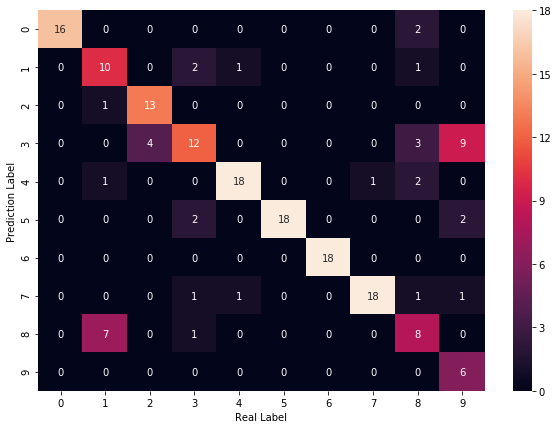

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:9 index:[5] real:5
#1 min_error:12 index:[3] real:2
#2 min_error:14 index:[8] real:8
#3 min_error:1 index:[0] real:0
#4 min_error:12 index:[1] real:1
#5 min_error:5 index:[7] real:7
#6 min_error:11 index:[6] real:6
#7 min_error:3 index:[3] real:3
#8 min_error:5 index:[2] real:2
#9 min_error:13 index:[1] real:1
#10 min_error:11 index:[7] real:7
#11 min_error:15 index:[1 7] real:4
#12 min_error:11 index:[6] real:6
#13 min_error:6 index:[3] real:3
#14 min_error:13 index:[1] real:1
#15 min_error:5 index:[3] real:3
#16 min_error:16 index:[7] real:9
#17 min_error:11 index:[1] real:1
#18 min_error:10 index:[7] real:7
#19 min_error:3 index:[6] real:6
#20 min_error:12 index:[8] real:8
#21 min_error:6 index:[4] real:4
#22 min_error:4 index:[3] real:3
#23 min_error:13 index:[1] real:1
#24 min_error:4 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:11 index:[5] real:5
#27 min_error:4 index:[3] real:3
#28 min_error:13 index:[6] real:6
#29 min_error:10 index:[3] real:9
#

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.8089466089466091

In [17]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1111111111111111
Accuracy on training set: 0.18888888888888888
Accuracy on training set: 0.23333333333333334
Accuracy on training set: 0.3
Accuracy on training set: 0.4777777777777778
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.5
Accuracy on training set: 0.5
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.6722222222222223
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.6888888888888889
Accuracy

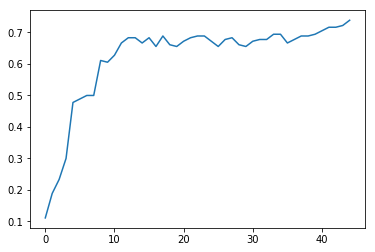

In [18]:
plt.plot(range(45),list_acc)
plt.show()

In [19]:
list_acc

[0.1111111111111111,
 0.18888888888888888,
 0.23333333333333334,
 0.3,
 0.4777777777777778,
 0.4888888888888889,
 0.5,
 0.5,
 0.6111111111111112,
 0.6055555555555555,
 0.6277777777777778,
 0.6666666666666666,
 0.6833333333333333,
 0.6833333333333333,
 0.6666666666666666,
 0.6833333333333333,
 0.6555555555555556,
 0.6888888888888889,
 0.6611111111111111,
 0.6555555555555556,
 0.6722222222222223,
 0.6833333333333333,
 0.6888888888888889,
 0.6888888888888889,
 0.6722222222222223,
 0.6555555555555556,
 0.6777777777777778,
 0.6833333333333333,
 0.6611111111111111,
 0.6555555555555556,
 0.6722222222222223,
 0.6777777777777778,
 0.6777777777777778,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6777777777777778,
 0.6888888888888889,
 0.6888888888888889,
 0.6944444444444444,
 0.7055555555555556,
 0.7166666666666667,
 0.7166666666666667,
 0.7222222222222222,
 0.7388888888888889]

In [20]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8317872603586889
Avg Base Learner:0.8089466089466091
